# Gini Coefficient

**Gini Coefficient:** A performance metric for binary classification models.

## Set Up

### Import Packages

In [1]:
# Packages
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

### Constants and Parameters

In [2]:
# constants
RANDOM_SEED = 42

# plotting defaults
sns.set_theme()
sns.set(font_scale=1.1)

### Generate Sample Data

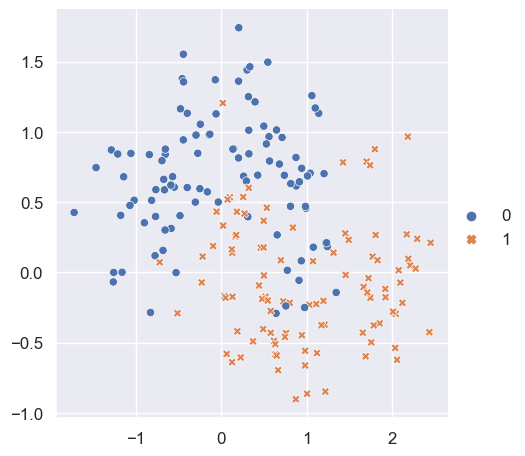

In [3]:
# generate sample data - 2 interleaving half circles
X, y = make_moons(n_samples=200, noise=0.3, random_state=RANDOM_SEED)

sns.relplot(x=X[:, 0], y=X[:, 1], hue=y, style=y);

### Sample Models

In [4]:
# train random forest classifier
forest_clf = RandomForestClassifier(
    n_estimators=500,
    max_leaf_nodes=16,
    n_jobs=-1,
    random_state=RANDOM_SEED,
)
forest_clf.fit(X, y)

y_pred = forest_clf.predict(X)
acc = accuracy_score(y, y_pred)
print("Training Accuracy: {:.2f}".format(acc))

Training Accuracy: 0.97


In [5]:
# train logistic regression
log_reg = LogisticRegression()
log_reg.fit(X, y)

y_pred = log_reg.predict(X)
acc = accuracy_score(y, y_pred)
print("Training Accuracy: {:.2f}".format(acc))

Training Accuracy: 0.83


## Cumulative Accuracy Profile (CAP) Curve

Consider a binary classification task. We reorder the samples by decreasing confidence that the label is positive. So we start with samples we are sure are positive and end with samples we are sure are negative. We then go through the samples, count how many *are* positive, and plot number of samples against number of positive samples. This is called the *Cumulative Accuracy Profile Curve*.

Let $N$ denote the total number of samples and $N_+$ denote the number of positive samples. A perfect model would accurately put all positive samples first, so the curve would be diagonal from $(0, 0)$ to $(N_+, N_+)$. We would expect a random model to be a straight line from $(0,0)$ to $(N, N_+)$.

We can evaluate a classifier by comparing its CAP curve against a perfect and a random model. This works best when the model can generate prediction probabilities.

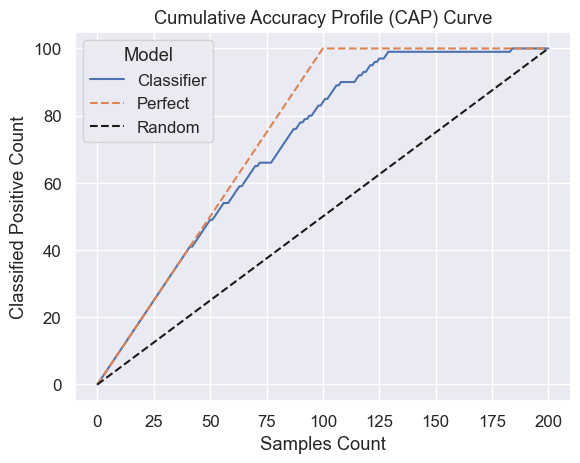

In [7]:
from cap import plot_cap_curve

plot_cap_curve(log_reg, X, y, method="predict_proba", normalised=False)

We often normalise the axes to [0, 1] to make comparisons easier.

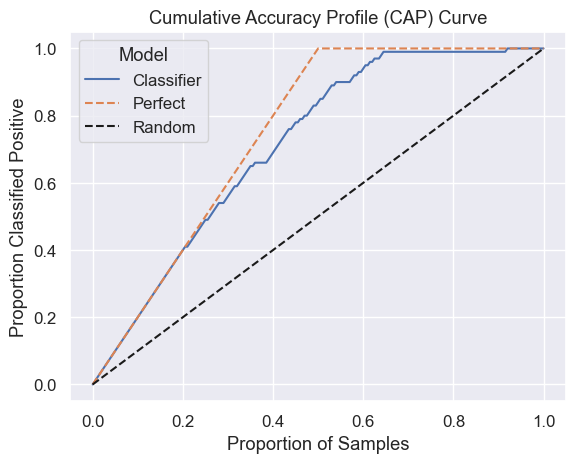

In [8]:
plot_cap_curve(log_reg, X, y, method="predict_proba", normalised=True)